<a href="https://colab.research.google.com/github/rbolsoni/Portfolio-Data-Science/blob/master/Analise_da_Violencia_no_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://www.imagemhost.com.br/images/2020/06/17/rio.png)







[![author](https://img.shields.io/badge/author-rbolsoni-orange.svg)](www.linkedin.com/in/rafabolsoni) 
[![author](https://img.shields.io/badge/see%20more-projects-brightgreen.svg)](https://github.com/rbolsoni) 




# Prelúdio

O nome é mencionado oficialmente pela primeira vez quando a segunda expedição exploratória portuguesa, comandada por Gaspar lemos, chegou em Janeiro de 1502, à baía, que o navegador supôs, compreensivelmente, ser a foz de um rio, por conseguinte, dando o nome à região do Rio de Janeiro. O começo da cidade como tal foi no Morro de São Januário, mais tarde conhecido como Morro do Castelo, e depois na Praça Quinze até hoje centro vital do Rio.

O Rio de Janeiro desenvolveu-se graças à sua vocação natural como porto. Na mesma época em que ouro foi descoberto no Estado de Minas Gerais, no final do século XVII, o Governador do Brasil foi feito Vice-rei. Salvador era capital da colônia, mas a importância crescente do porto do Rio garantiu a transferência da sede do poder para o sul, para a cidade que se tornaria, e ainda é, o centro intelectual e cultural do país.

A cidade havia crescido bastante, no final do século XIX, contava com 800.000 habitantes e os problemas sanitários, de emprego, habitacionais e as constantes epidemias de varíola, tuberculose e febre amarela castigavam a então capital do Brasil.


## Atualmente
O estado do Rio de Janeiro tem segundo estimativa do IBGE 16,46 milhões de habitantes, com a região metropolitana contendo mais de 12 milhões de habitantes e a cidade mais importante do estado de mesmo nome, com 6,7 milhões de habitantes e é o maior destino turístico internacional da America do Sul. É um dos principais centros econômicos, culturais e financeiros do país, sendo internacionalmente conhecida por diversos ícones culturais e paisagísticos, como o Pão de Açúcar, o morro do Corcovado com a estátua do Cristo Redentor. As cidades do estado têm importância turística e econômica conforme a região onde estão instaladas. Na região costeira, que é chamada de Costa do Sol, estão Búzios, Cabo Frio, Arraial do Cabo, Rio das Ostras, Maricá e Saquarema. Na Região Serrana estão Petrópolis, Teresópolis e Nova Friburgo. Entre elas, Petrópolis tem uma arquitetura especial e foi escolhida para as férias de Verão de Dom Pedro II.

## Criminalidade
Desde meados dos anos 1990, em decorrência da violência urbana, o Rio vem conquistando espaço na imprensa nacional e (nos últimos anos) internacional. A cidade apresenta índices elevados de criminalidade, em especial, o homicídio.

Por conta disso, hoje vamos analisar mais de perto os dados da criminalidade do Rio de Janeiro e tirar *insights* importantes sobre a real situação da região.

![alt text](https://image.freepik.com/fotos-gratis/grafico-de-dados-mostram-o-grafico-de-icone-de-analise-de-resumo_53876-64935.jpg)


# Origem dos dados
Todos os dados que são usados aqui foram retirados da banco de dados do Instituto de Segurança Pública do Estado do Rio de Janeiro (ISP-RJ), que faz parte do Departamento de Segurança Pública do Estado do Rio de Janeiro (DSP-RJ). Os dados estão disponíveis no site do [ISPDados](http://www.ispdados.rj.gov.br/estatistica.html) e contém uma série histórica de 29 anos (desde janeiro 1991 á agosto de 2019).

Uma grande parte dos bancos de dados públicos de origem estatal no Brasil tem dados faltando por diversos motivos, seja por dificuldade de acesso a tecnologia por parte dos servidores, perda de informações e arquivos físicos, erros de *input*, arquivos corrompidos, demora na digitalização de documentos antigos ou muitos dados antigos, como é o caso agora.





### Dicionário

Podemos ver [aqui](http://www.ispdados.rj.gov.br/Arquivos/DicionarioVariaveisDOMensalEstadoDesde1991.xlsx) o dicionário completo.
Abaixo incluirei somente o dicionário dos dados que iremos analisar no momento.

* `vano` = ano do registro
* `mes` = mês do registro              
* `hom_doloso` = homicídio doloso (com intenção de matar)  
* `latrocinio` = roubo seguido de morte
* `tentat_hom` = tentativa de homicídio
* `lesao_corp_dolosa` = lesão corporal dolosa
* `roubo_comercio` = roubo a comércio
* `roubo_residencia` = rouso a residência
* `roubo_veiculo` = roubo a veículo
* `roubo_carga` = roubo de carga
* `roubo_transeunte` = roubo a pedestre
* `roubo_em_coletivo` = roubo em transporte coletivo
* `roubo_banco` = roubo em agencia bancária
* `outros_roubos` = outros tipos de roubo
* `total_roubos` = total de roubos
* `furto_veiculos` = furto de veículos
* `furto_transeunte` = furto de pedestres
* `outros_furtos` = outros tipos de furtos
* `total_furtos` = total de furtos
* `apreensao_drogas` = apreensão de drogas
* `recuperacao_veiculos` = veículos recuperados
* `encontro_cadaver` = quantidade de cadáveres encontrados
* `indicador_letalidade` = indicador de letalidade
* `indicador_roubo_rua` = indicador de roubo na rua
* `indicador_roubo_veic` = indicador de roubo a veículos


# Análise exploratória

Iremos utilizar o auxílio da biblioteca [Pandas](https://pandas.pydata.org/), que é uma das melhores bibliotecas para analise de dados da linguagem Python e ajudará a realizar a analise exploratória de maneira mais eficaz. 




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')


## Análise preliminar dos dados

Primeiramente vamos buscar algumas prévias para termos melhor ideia do tamanho do nosso *dataframe* e quais informações importantes constam nele. Queremos ver informações como, tipos de dados, nomes de colunas, quantidade de colunas e linhas e informações das primeiras linhas do nosso dataset. No final tambem iremos descobrir qual a % de dados ausentes.

In [2]:
df.shape

(344, 56)

In [3]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [4]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [23]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [27]:
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


In [6]:
df.isnull().sum() / df.shape[0] * 100

vano                           0.000000
mes                            0.000000
hom_doloso                     0.000000
lesao_corp_morte              27.906977
latrocinio                     0.000000
hom_por_interv_policial       24.418605
tentat_hom                     0.000000
lesao_corp_dolosa              0.000000
estupro                       41.860465
hom_culposo                   24.418605
lesao_corp_culposa            27.906977
roubo_comercio                 0.000000
roubo_residencia               0.000000
roubo_veiculo                  0.000000
roubo_carga                    0.000000
roubo_transeunte               0.000000
roubo_em_coletivo              0.000000
roubo_banco                    0.000000
roubo_cx_eletronico           41.860465
roubo_celular                 31.395349
roubo_conducao_saque          41.860465
roubo_apos_saque              41.860465
roubo_bicicleta               80.232558
outros_roubos                  0.000000
total_roubos                   0.000000


## Trabalhando o Dataframe

Algumas classificações foram sendo incluidas com o passar do tempo. Podemos observar que as colunas `furto_bicicleta` e `roubo_bicicleta` tem mais de 80% dos dados ausentes, pois começaram a ser contabilizadas a partir de 2014. Como queremos fazer a análise dos dados da sequência histórica completa, e essas colunas que foram adicionadas depois, nós iremos retirar do dataframe e vamos deixar para uma análise posterior.

In [7]:
df_clean = df.drop(['lesao_corp_morte','hom_por_interv_policial','estupro','hom_culposo','lesao_corp_culposa','roubo_cx_eletronico','roubo_celular','roubo_conducao_saque',
                    'roubo_apos_saque','roubo_bicicleta','furto_coletivo','furto_celular','furto_bicicleta','sequestro','extorsao','sequestro_relampago','estelionato',
                    'posse_drogas','trafico_drogas','apreensao_drogas_sem_autor','apf','aaapai','cmp','cmba','ameaca','pessoas_desaparecidas','encontro_ossada',
                    'pol_militares_mortos_serv','pol_civis_mortos_serv','registro_ocorrencias'], axis=1).replace('vano', 'ano')
df_clean.isnull().sum() / df.shape[0] * 100

vano                    0.0
mes                     0.0
hom_doloso              0.0
latrocinio              0.0
tentat_hom              0.0
lesao_corp_dolosa       0.0
roubo_comercio          0.0
roubo_residencia        0.0
roubo_veiculo           0.0
roubo_carga             0.0
roubo_transeunte        0.0
roubo_em_coletivo       0.0
roubo_banco             0.0
outros_roubos           0.0
total_roubos            0.0
furto_veiculos          0.0
furto_transeunte        0.0
outros_furtos           0.0
total_furtos            0.0
apreensao_drogas        0.0
recuperacao_veiculos    0.0
encontro_cadaver        0.0
indicador_letalidade    0.0
indicador_roubo_rua     0.0
indicador_roubo_veic    0.0
fase                    0.0
dtype: float64

Precisamos transformar as datas que estavam em colunas diferentes para o formato de `datetime` reconhecido pelo Python e na mesma coluna para facilitar a plotagem dos gráficos.

In [8]:
df_clean['data'] = df_clean.mes.astype(str) + '-' + df_clean.vano.astype(str)

In [9]:
df_clean['data'] = pd.to_datetime(df_clean['data'], format='%m-%Y')

In [10]:
df_clean.set_index('data', drop=True, inplace=True)

In [11]:
df_clean.reset_index(inplace=True)

In [12]:
df_clean.head()

,data,vano,mes,hom_doloso,latrocinio,tentat_hom,lesao_corp_dolosa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase
0,1991-01-01,1991,1,657,15,162,3051,350,188,1174,63,967,381,37,158,3318,2009,1147,3561,6717,133,872,217,672,1348,1174,3
1,1991-02-01,1991,2,732,17,175,3421,357,171,1097,64,963,432,35,142,3261,1850,1066,3309,6225,127,751,209,749,1395,1097,3
2,1991-03-01,1991,3,713,25,216,3613,443,191,1265,71,963,422,43,131,3529,2084,1062,3573,6719,80,789,188,738,1385,1265,3
3,1991-04-01,1991,4,634,20,200,3211,425,199,1415,81,1186,354,36,112,3808,2085,1195,3290,6570,133,787,140,654,1540,1415,3
4,1991-05-01,1991,5,650,20,146,3051,553,231,1449,82,931,335,27,147,3755,2185,723,3546,6454,163,845,78,670,1266,1449,3


## Informações estatisticas gerais da criminalidade do Rio de Janeiro

Agora podemos observar um dataframe somente com dados completos desde 1991 para realizar a análise. Vamos agora explorar os dados para retirar insights importantes.

Abaixo iremos ver estatisticas gerais da criminalidade do Rio de Janeiro a partir dos dados que foram limpos.

In [13]:
df_clean.describe()

,vano,mes,hom_doloso,latrocinio,tentat_hom,lesao_corp_dolosa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2004.837209,6.453488,504.555233,15.668605,318.267442,5492.799419,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,1211.223837,9428.119186,1674.671512,1518.921512,5994.328488,10433.177326,1071.930233,1772.238372,66.261628,577.691860,4734.738372,2448.697674,2.994186
std,8.289036,3.447759,113.774481,5.861427,127.606645,1514.220579,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,800.576723,4578.013053,294.852020,971.853102,1964.767779,3696.725756,643.381991,656.761843,34.464519,104.973929,3204.054864,789.689559,0.076138
min,1991.000000,1.000000,272.000000,2.000000,122.000000,2350.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,2322.000000,4691.000000,80.000000,729.000000,0.000000,334.000000,1086.000000,1097.000000,2.000000
25%,1998.000000,3.000000,413.750000,11.000000,200.000000,4067.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,811.750000,5107.750000,1430.500000,732.000000,3978.000000,6700.250000,714.500000,1276.750000,42.000000,500.000000,1557.000000,1889.750000,3.000000
50%,2005.000000,6.000000,507.000000,15.000000,318.500000,5830.500000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,1154.000000,9243.500000,1637.500000,1076.500000,6559.000000,10448.500000,979.500000,1755.000000,60.500000,590.000000,4190.000000,2322.000000,3.000000
75%,2012.000000,9.000000,577.250000,19.000000,398.250000,6582.500000,536.250000,151.250000,2778.000000,401.250000,5385.250000,784.000000,14.000000,1635.000000,11590.500000,1833.250000,2334.250000,7601.500000,13877.500000,1546.000000,2202.000000,87.000000,649.000000,6872.750000,2778.000000,3.000000
max,2019.000000,12.000000,831.000000,36.000000,645.000000,9050.000000,914.000000,300.000000,5358.000000,1329.000000,9669.000000,1628.000000,54.000000,3661.000000,23203.000000,2630.000000,5368.000000,9880.000000,18003.000000,2543.000000,3695.000000,217.000000,848.000000,13833.000000,5358.000000,3.000000


## Visualização dos dados

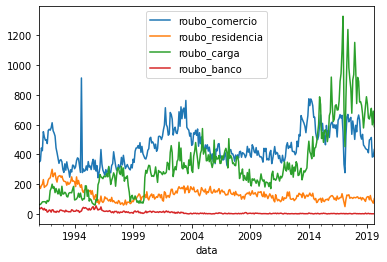

In [15]:
df_clean.plot(x='data', y=['roubo_comercio','roubo_residencia','roubo_carga','roubo_banco']);

Podemos observar nesse gráfico que o roubo de carga tem tido uma taxa de crescimento alta nos ultimos 10 anos. De 2009 até o pico que ocorreu em meados de 2017 o roubo de cargas teve um aumento de mais de 500%. Os dados de 2017 mostram que [a cada 23 minutos, um caminhão de carga é roubado no país](https://oglobo.globo.com/economia/infraestrutura/roubo-de-cargas-aumenta-custo-de-produtos-em-ate-35-21074993#:~:text=O%20estados%20de%20Rio%20de,15%20por%20cada%20cem%20quilos.). Esse aumento de roubo de carga gera um prejuízo enorme para as empresas de transporte, pela perda de mercadorias e pelo aumento nos custos de segurança particular e seguros que acabam gerando um efeito cascata e repassando esse custo para o consumidor. Um estudo sobre o impacto econômico do roubo de cargas, divulgado pela Federação das Indústrias do Estado do Rio de Janeiro (Firjan), mostra que essas ocorrências podem elevar os preços dos produtos em até 35%.

![alt text](https://www.imagemhost.com.br/images/2020/06/23/numeros-economia-curvas-desk.png)

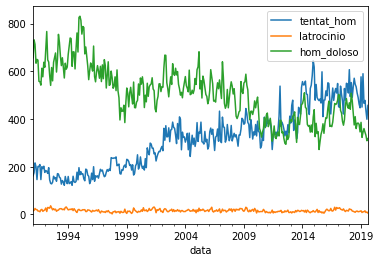

In [16]:
df_clean.plot(x='data', y=['tentat_hom','latrocinio','hom_doloso']);

Nesse gráfico podemos observar que a taxa de homicídio doloso tem diminuído nos ultimos anos, porém a tentativa de homicídio tem aumentado em uma relação quase equivalente. O estado tem uma média de 504,4 homicídios dolosos e de 318,2 tentativas de homicídio todo ano. Só em 2018 morreram 4950 pessoas decorrentes de homicídio doloso que representa 10,12% de todos os homicídios dolosos do Brasil. O Rio de Janeiro obteve em 2018 uma taxa de 28,85 mortes para cada 100 mil habitantes, o que é ligeiramente maior que a taxa nacional de 23,38 mortes para cada 100 mil habitantes.

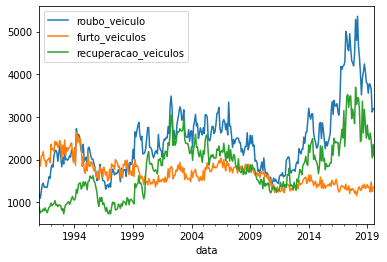

In [18]:
df_clean.plot(x='data', y=['roubo_veiculo','furto_veiculos','recuperacao_veiculos']);

O que chama bastante a atenção nesse gráfico é o crescimento da taxa de roubo de veiculos a partir do ano de 2014, onde o pico se deu em 2017 e foram registrados mais de 5 mil roubos de veículos no estado do Rio de Janeiro mas o número vem caindo de lá pra cá e isso tem se refletido nos valores dos seguros de carro no estado.

![alt text](https://www.imagemhost.com.br/images/2020/06/23/queda-preco.jpg)

# Conclusão

Nota-se que [em 2017 houve greve da polícia civil onde 90% das delegacias do estado do Rio de Janeiro ficaram fechadas](https://www.brasildefato.com.br/2017/02/07/90-das-delegacias-do-rio-de-janeiro-estao-em-greve-afirmam-policiais-civis/) e isso comprometeu alguns os registros desse período, entretanto não foi tão significativo para o dados no geral.

Dados do 11º Anuário de Segurança Pública, realizado pelo Fórum Brasileiro de Segurança Pública, revelam que 2016 foi o ano mais violento da história do Brasil: 61,6 mil pessoas foram assassinadas no ano passado.

Para se ter uma boa ideia, o número de assassinatos cometidos no Brasil em 2016 foi equivalente às mortes provocadas pelas bombas atômicas que dizimaram a cidade de Nagasaki, em 1945, no Japão.

Por incrivel que pareça estado do Rio de Janeiro em 2016 não foi o mais violento do Brasil e ficou em 10º lugar no índice de violencia para cada 100 mil habitantes e o estado de Sergipe é quem encabeça a lista. Apesar disso em números absolutos do Rio fica em segundo lugar 6262 mortes, somente atrás do estado da Bahia com 7110 mortes.

Os dados mostram que o estado do Rio de Janeiro segue uma tendência nacional de uma leve queda da criminalidade que podemos observar nos ultimos 2 anos. O Brasil ainda está muito longe dos países mais seguros do mundo mas tem melhorando e seguindo uma tendência de diminuição das taxas de criminalidade com o passar dos anos.

